<a href="https://colab.research.google.com/github/zafarkarmani/NLP_BERTs/blob/master/SQL_Lab_1_Weather_(Exercises).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 Setting up the Weather database

We need to download the database first by using the following code in a *code block* and also upgrade the version of the SQL database (SQLite).
We can run the code by pressing the "▶" play button. This needs to be run once at the begining of the session.




In [1]:
!wget https://essexuniversity.box.com/shared/static/c3vee0c2iclzc9wouhblr9jp5v7lix0o.db -O weather.db &> /dev/null

In order to issue SQL commands we will use the SQLite capabilities of Google Colab by loading the SQL extension with the statement `%load_ext sql`:







In [ ]:
# now we can use the magic extension to connect to our SQLite DB
# use %sql to write an inline SQL command
%load_ext sql
# Loads the downloaded database (weather data) inthis case
%sql sqlite:///weather.db
# Fixes some rendering errors
%config SqlMagic.style = '_DEPRECATED_DEFAULT'
# Shows the sqlite version
%sql SELECT sqlite_version();

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:///weather.db
Done.


sqlite_version()
3.37.2


Then we can run SQL queries by using:
- the `%sql` expression for a single line query
- the `%%sql` expression for a multiple line query

## Display all tables
As an example we cal display all the tabled loadded in the database by using the
following statement:

In [ ]:
# Display all the table names
# omiting the ones starting with "sqlite_" (internal not to be used directly)
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:///weather.db
Done.


name
cat_locations
cat_postcode_latlong
cat_regions
country
metoffice_dailyweatherdata
metoffice_forecast_text
postcodelatlng
tempW
timezone
weatherType


# Syntax
## Create Statement
we will use the `CREATE` statement to add a new table into the database. The syntax is:

```sql
CREATE TABLE Table_name (
Field1 DATA_TYPE CONSTRAIN,
Field2 DATA_TYPE CONSTRAIN, ...)
```

In [ ]:
%%sql
CREATE TABLE new_locations (
Location_id int PRIMARY KEY,
Location_name varchar(40) DEFAULT NULL);

 * sqlite:///weather.db
Done.


[]

## Insert
Next to do is inserting some records into our new table
```sql
INSERT INTO Table_name
VALUES (rec1_field1, rec1_ field2, ...), (rec2_field1, rec2_ field2);
```
Let’s insert a record for the University of Essex and another one for Colchester:

In [ ]:
%%sql
INSERT INTO new_locations VALUES
(0, "University of Essex"),
(1, "Colchester");

 * sqlite:///weather.db
2 rows affected.


[]

## Alter TABLE ADD
There are many cases when we want to alter a table after its construction, we can use the `ALTER` statement for this
```sql
ALTER TABLE Table_name ADD [DROP, RENAME] Field [Constrain] ;
```
Add a column `status` to the table new_locations:

In [ ]:
%%sql
ALTER TABLE new_locations ADD Region VARCHAR(40);

 * sqlite:///weather.db
Done.


[]

In [ ]:
%%sql
ALTER TABLE new_locations DROP Region;

 * sqlite:///weather.db
Done.


[]

**Note: please do all deletions wisely.**

## Update
We can use the UPDATE statement to assign new values in our database.
```sql
UPDATE Table_name SET Field = new_value;
UPDATE Table_name SET Field = new_value WHERE logic_sentence;
```
Example: Assign the value TRUE to the region in the table new_locations

In [ ]:
%%sql
-- we deleted previously the region column so we re-adding it to SQL
ALTER TABLE new_locations ADD Region VARCHAR(40);
UPDATE new_locations SET region =True;

 * sqlite:///weather.db
Done.
2 rows affected.


[]

## Delete statement
Using the `DELETE` statement we can also delete records from the data base that matches a condition.
```sql
DELETE FROM Table_name WHERE Field = condition;
```
Example: Delete all data from table new_locations where `Location_name` is equal to `Colchester`

In [ ]:
%%sql
SELECT * From new_locations; -- let's print the table

 * sqlite:///weather.db
Done.


Location_id,Location_name,Region
0,University of Essex,1
1,Colchester,1


In [ ]:
%%sql
DELETE FROM new_locations WHERE Location_name ="Colchester";
SELECT * From new_locations; -- let's print the table again

 * sqlite:///weather.db
0 rows affected.
Done.


Location_id,Location_name,Region
0,University of Essex,1
1,Colchester,1


## Drop and Truncate statements

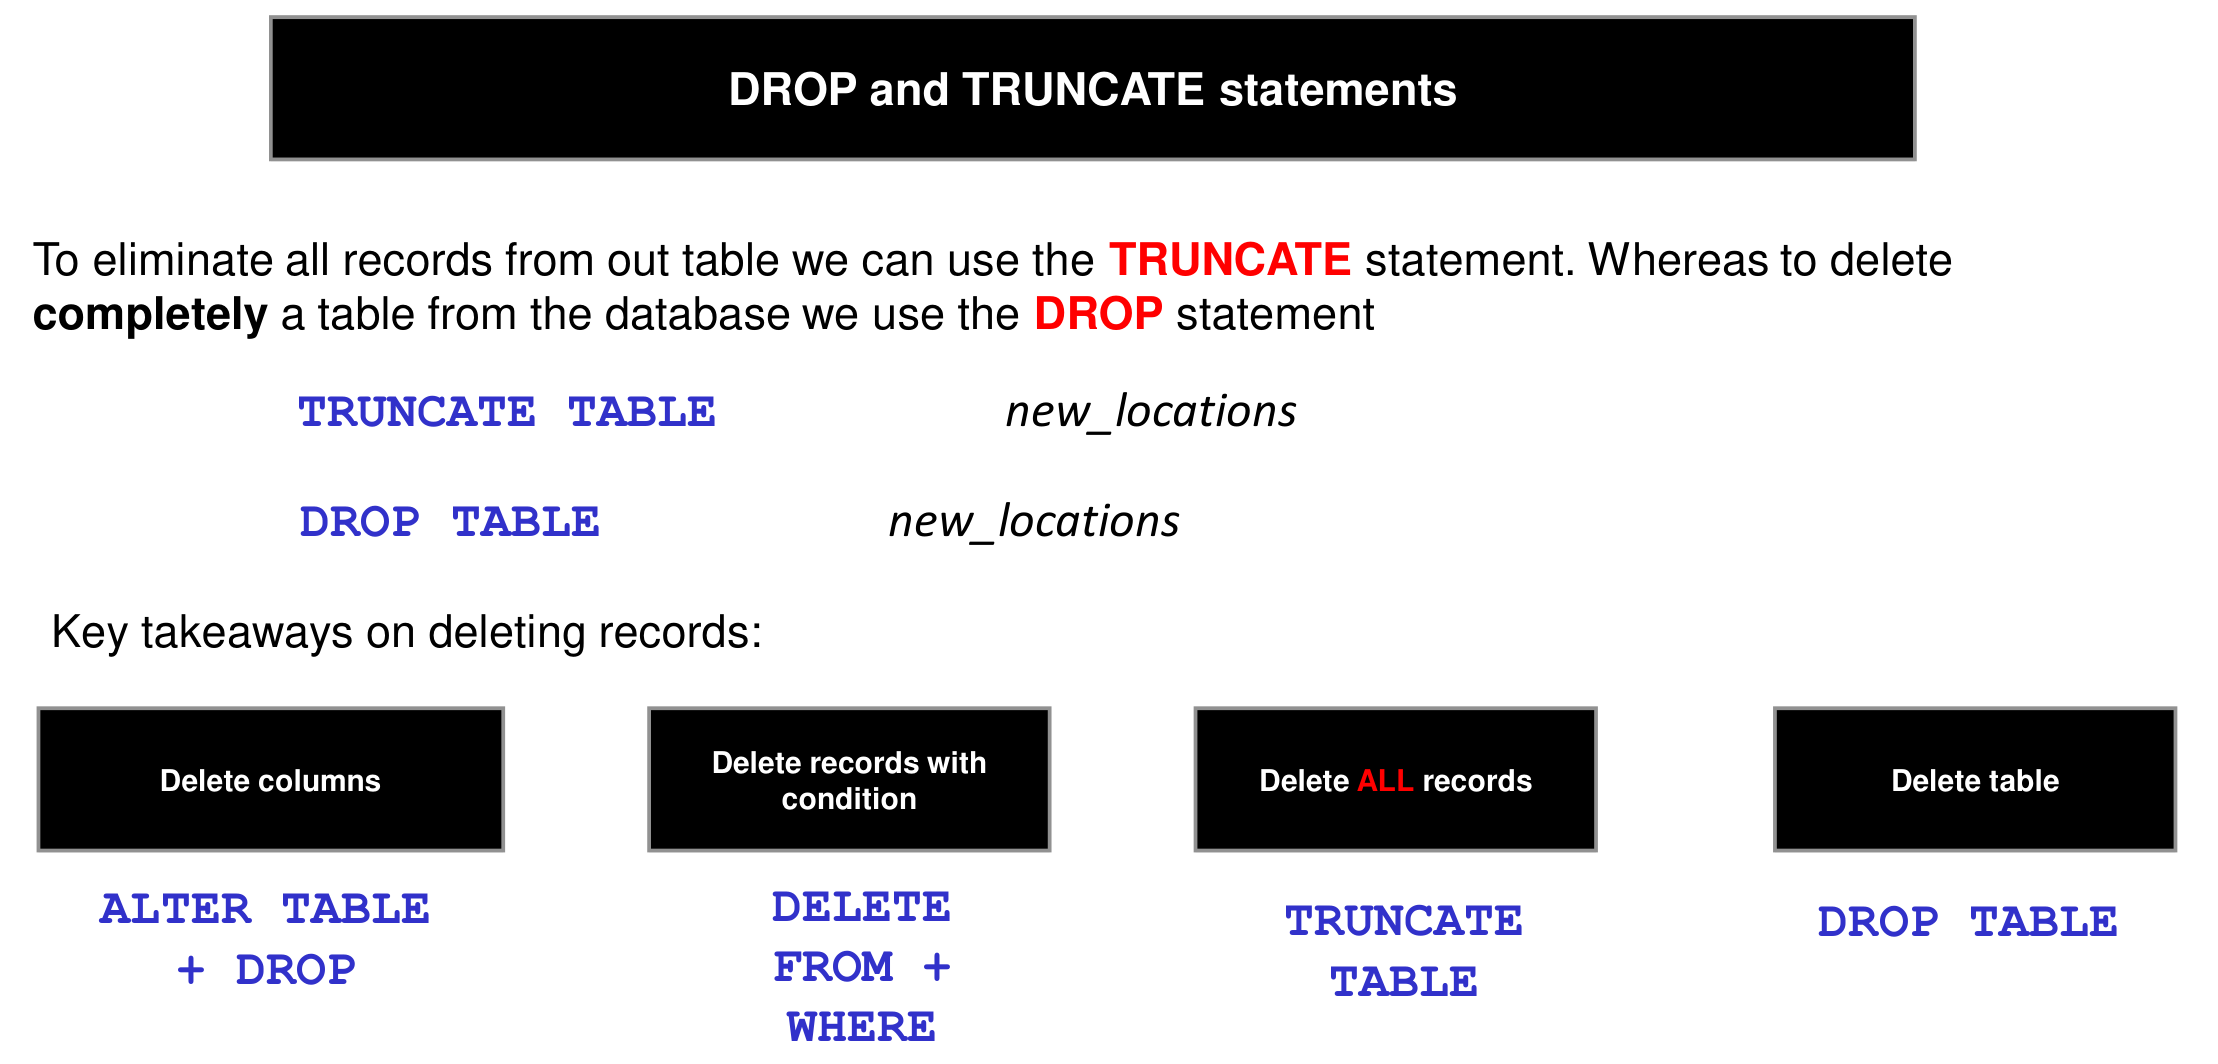

# Exercise PART I
MySQL can open multiple databases so we need to specify the name of the database (e.g. `DATABASE_NAME.TABLE_NAME`).
But `SQLite` (the SQL database that we use in this notebook) opens only one database at a time and we don't use the name of the database. As an example the table `cat_regions` is:
- **MySQL**: `weather_db.cat_regions`
- **SQLite**: `cat_regions`

## Exercise 1
Using the CREATE TABLE statement, create a table called `client_data` with the
following schema:

Field       | Data Type  | Constaint
------------|------------|-------------------
ID          | integer    | Primary key
First_name  | varchar 40 | NOT NULL
Last_name   | varchar 40 | None
Nationality | varchar 40 | None
Age         | float      | greather than 18

In [ ]:
%%sql


## Exercise 2
Insert the following records in the data base using the `INSERT` statement:

ID	| first_name	| last_name	| nationality	| Age
----|-------------|-----------|-------------|------
1	  | John	      | S	        | British	    |None
2	  | Peter	      |Jackson    |	None	      |20
3	  | Tom         |	W         |	None        |20
4	  | Jack	      |Patrick	  | American    |30


In [ ]:
%%sql


## Exercise 3
Add a column called "type" to the Client_data table and fill the records of this column with the value '1' for the records where nationality is known, and '2' otherwise.

In [ ]:
%%sql


## Exercise 4
Delete the records of the table client_data where the last name is unknown.
Although we don’t have any fields with this constraint, we can still use:

In [ ]:
%%sql


## Exercise 5
Delete all the content from the column ‘Age’ **without** deleting the column from the schema.

In [ ]:
%%sql


## Exercise 6
Delete table client_data including the schema.



In [ ]:
%%sql


# PART 2

## Exercise 1
There are many records in the table `cat_locations` where the country column is null. Fill these records with the value `"UK"`.

In [ ]:
%%sql



## Exercise 2
Delete the rows from table `tempW` where rainfall is `null`

In [ ]:
%%sql


## Exercise 3
From this table also delete the `timestamp` column from the schema.

In [ ]:
%%sql